In [159]:
import numpy as np
import pandas as pd

import mordred
from rdkit import Chem
from mordred import Calculator, descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [160]:
# downlX=ad data from https://moleculenet.org/datasets-1
lipo_data = pd.read_csv("./Lipophilicity.csv")

In [161]:
lipo_data.head()

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [176]:
calc = Calculator(descriptors, ignore_3D=True)
mols = [Chem.MolFromSmiles(i) for i in lipo_data.smiles]
mol_features = calc.pandas(mols)

#### Find features with invalid data

In [175]:
# standard scale
tmp = sc.fit_transform(mol_features.astype(float))
# find the columns that contain NaN values
nan_cols = np.where(np.isnan(tmp))[1]
nan_col_headers = mol_features.columns[nan_cols]
# drop the columns that contain NaN values
data = mol_features.drop(nan_col_headers, axis=1)

In [165]:
data.loc[:, 'exp'] = lipo.exp.values

#### Split into train,val and test sets

In [166]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
test, val = train_test_split(test, test_size=0.5, random_state=42)

#### Seperate features and targets

In [168]:
# features
x_train = train.drop(['exp'], axis=1) # train features
x_val = val.drop(['exp'], axis=1) # validation features
x_test = test.drop(['exp'], axis=1) # test features
# targets
y_train = train.exp.values # train targets
y_val = val.exp.values # validation targets
y_test = test.exp.values # test targets

#### Standard scale the features

In [169]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train.values)
x_val = sc.transform(x_val.values)
x_test = sc.transform(x_test.values)

#### Define the model

In [170]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#### Train using the training data

In [171]:
rf.fit(X=x_train, y=y_train)

RandomForestRegressor(random_state=42)

#### Make predictions on the test data

In [172]:
test_pred = rf.predict(x_test)

In [173]:
r2 = r2_score(y_pred = test_pred, y_true = y_test)
rmse = mean_squared_error(y_pred=test_pred, y_true=y_test)**.5
print(f'r2 score =  {r2}')
print(f'rmse = {rmse}')

r2 score =  0.6660131200635068
rmse = 0.7036231745057606


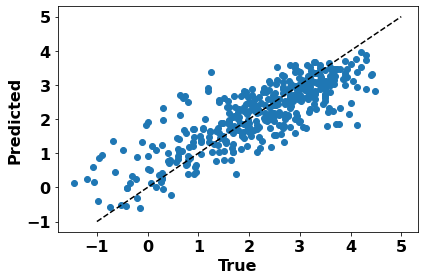

In [174]:
plt.plot(y_test, test_pred, 'o');
plt.plot([-1, 5], [-1,5], 'k--')
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.xlabel('True', fontsize=16, fontweight='bold');
plt.ylabel('Predicted', fontsize=16, fontweight='bold');
plt.tight_layout();
plt.savefig('lipo_test.png')